In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import keras
from tqdm import tqdm
from keras.preprocessing import image
import matplotlib 
from matplotlib import pyplot as plt
import os
import cv2

2024-06-08 19:37:42.632214: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 19:37:42.632257: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 19:37:42.632294: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-08 19:37:42.641119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 19:37:43.855664: W tensorflow/compiler/

In [2]:
data = []
labels = []
classes = 43
cur_path = 'Train'

for i in tqdm(os.listdir(cur_path)):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

100%|██████████| 43/43 [00:07<00:00,  5.57it/s]

(39209, 64, 64, 3) (39209,)


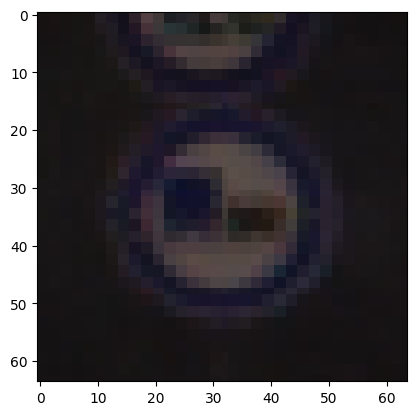

In [3]:
plt.imshow(data[3907])

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.25, random_state=21)

print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

# converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

((29406, 64, 64, 3), (29406,)) ((9803, 64, 64, 3), (9803,))


In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(64,64,3)))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=43, activation = 'softmax'))

2024-06-08 19:37:53.877356: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-08 19:37:53.910717: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 average_pooling2d (Average  (None, 30, 30, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 average_pooling2d_1 (Avera  (None, 13, 13, 32)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 120)               6

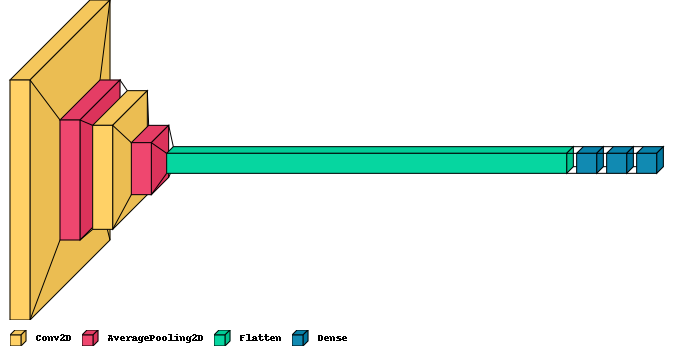

In [8]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [9]:
epochs = 15
history = model.fit(x_train, y_train, 
                   batch_size=64,
                   epochs=epochs,
                   validation_data=(x_test, y_test))

Epoch 1/15
460/460 [==============================] - 49s 106ms/step - loss: 1.0268 - accuracy: 0.7735 - val_loss: 0.3114 - val_accuracy: 0.9269
Epoch 2/15
460/460 [==============================] - 50s 109ms/step - loss: 0.2177 - accuracy: 0.9457 - val_loss: 0.2365 - val_accuracy: 0.9447
Epoch 3/15
460/460 [==============================] - 47s 102ms/step - loss: 0.1247 - accuracy: 0.9694 - val_loss: 0.1725 - val_accuracy: 0.9586
Epoch 4/15
460/460 [==============================] - 49s 107ms/step - loss: 0.1203 - accuracy: 0.9705 - val_loss: 0.1856 - val_accuracy: 0.9618
Epoch 5/15
460/460 [==============================] - 47s 101ms/step - loss: 0.1022 - accuracy: 0.9751 - val_loss: 0.2060 - val_accuracy: 0.9530
Epoch 6/15
460/460 [==============================] - 47s 102ms/step - loss: 0.0825 - accuracy: 0.9789 - val_loss: 0.1601 - val_accuracy: 0.9668
Epoch 7/15
460/460 [==============================] - 47s 102ms/step - loss: 0.0599 - accuracy: 0.9849 - val_loss: 0.1498 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


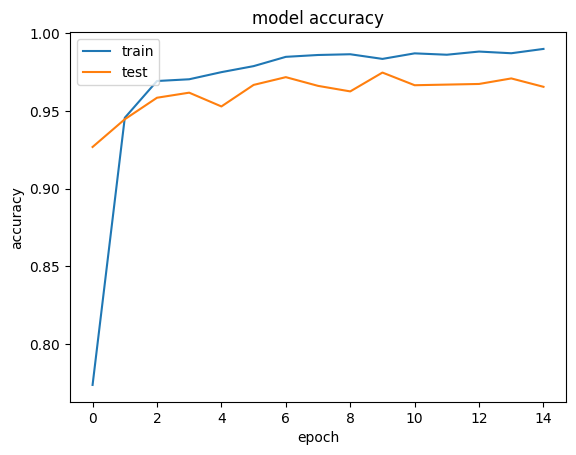

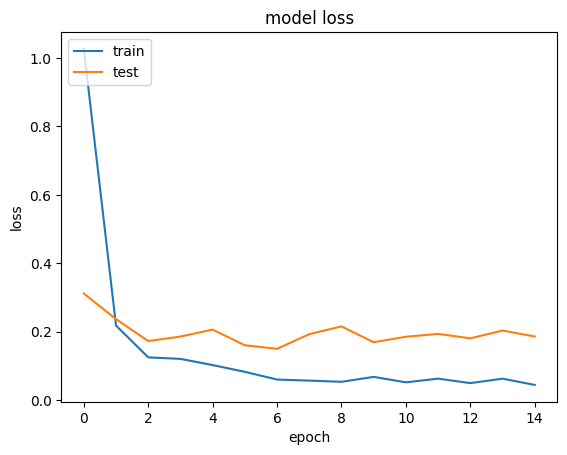

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
y_test = pd.read_csv('Test.csv')

In [12]:
labels_test = y_test['ClassId'].values
img_test = y_test['Path'].values
test_dir = ''
data = []
for img in img_test:
    img_path = os.path.join(test_dir, img)
    image = cv2.imread(img_path, -1)
    image = cv2.resize(image, (64,64), interpolation = cv2.INTER_NEAREST)
    data.append(np.array(image))
X_test = np.array(data)

In [13]:
from sklearn.metrics import accuracy_score

pred = np.argmax(model.predict(X_test), axis=-1)

print("Test accuracy: ", accuracy_score(labels_test, pred) * 100 )

395/395 [==============================] - 4s 10ms/step
Test accuracy:  90.53840063341251
